<a href="https://colab.research.google.com/github/srujanav67/1000Movies_EDAProject/blob/master/EDA_TitanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis I

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Off all the passengers, how many survived and how many died?](#section401)<br/>
    - 4.2 [Who is more likely to survive, Male or Female?](#section402)<br/>
    - 4.3 [What is the rate of survival of males, females and child on the basis of Passenger Class?](#section403)<br/>
    - 4.4 [What is the survival rate considering the Embarked variable?](#section404)<br/>
    - 4.5 [Survival rate - Comparing Embarked and Sex.](#section405)<br/>
    - 4.6 [How survival rate vary with Embarked, Sex and Pclass](#section406)<br/>
    - 4.7 [Segment age in bins with size 10.](#section407)<br/>
    - 4.8 [Analysing SibSp and Parch variable.](#section408)<br/>
    - 4.9 [Segment fare in bins of size 12.](#section409)<br/>
    - 4.10 [Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'](#section410)<br/>
    - 4.11 [Establish coorelation between all the features using heatmap.](#section411)<br/>
    - 4.12 [Hypothesis: Women and children are more likely to survive](#section412)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


<a id=section2></a>

### 2. Data Loading and Description
![image.png](attachment:image.png)

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |

#### Some Background Information
The sinking of the RMS Titanic in the early morning of __15 April 1912, four days into the ship's maiden voyage__ from __Southampton to New York City__, was one of the deadliest peacetime maritime disasters in history, __killing more 
than 1,500 people__. The largest passenger liner in service at the time, Titanic had an __estimated 2,224 people on 
board__ when she struck an __iceberg in the North Atlantic__. The ship had received __six warnings__ of sea ice but 
was travelling at near __maximum speed when the lookouts sighted the iceberg__. Unable to turn quickly enough, the 
ship suffered a glancing blow that buckled the starboard (right) side and opened __five of sixteen compartments to 
the sea__. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the __unequal treatment__ of the three passenger classes during the evacuation. Inquiries recommended sweeping changes to maritime regulations, leading to the __International Convention for the Safety of Life at Sea (1914)__, which continues to govern maritime safety.

#### Importing packages                                          

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importing the Dataset

In [0]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

<a id=section3></a>

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [0]:
titanic_data.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(891, 12)

titanic_data has __891 rows__ and __12 columns.__

In [0]:
titanic_data.columns                                            # This will print the names of all columns.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id=section301></a>

In [0]:
titanic_data.tail()                                                   # This will print the last n rows of the Data Frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [0]:
titanic_data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above output we can see that __Age__ and __Cabin__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section302></a>

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [4]:
profile = pandas_profiling.ProfileReport(titanic_data)
profile.to_file(outputfile="titanic_before_preprocessing.html")

TypeError: ignored

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __titanic_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.
    - Replacing 0 values of fare with median values.

In [0]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [0]:
median_age = titanic_data.Age.median()
titanic_data.Age.fillna(median_age, inplace = True)

In [0]:
titanic_data.drop('Cabin', axis = 1,inplace = True)

In [0]:
titanic_data['Fare']=titanic_data['Fare'].replace(0,titanic_data['Fare'].median())

In [0]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

- Segmenting __Sex__ column as per __Age__, Age less than 15 as __Child__, Age greater than 15 as __Males and Females__ as per their gender.

In [0]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [0]:
titanic_data[titanic_data.Age<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [0]:
titanic_data[titanic_data.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


<a id=section304></a>

## 3.4 Post Pandas Profiling

In [0]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(titanic_data)
profile.to_file(outputfile="titanic_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also introduced new feature named __FamilySize__. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __titanic_after_preprocessing.html__ and titanic_before_preprocessing.html.<br/>
In titanic_after_preprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __13__ 
- Observe the newly created variable FamilySize, Click on Toggle details to get more detailed information about it.

<a id=section4></a>

### 4. Questions

<a id=section401></a>

### 4.1 Of all the passengers, how many survived and how many died ?

- Using Countplot

Text(0.5, 1.0, 'Count plot for survived.')

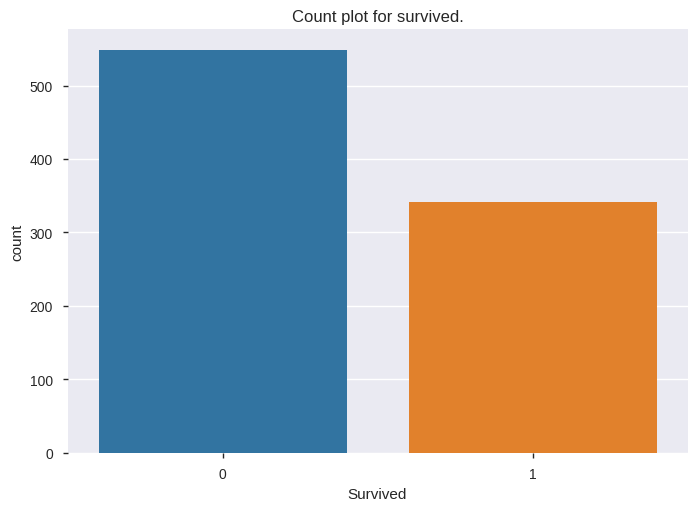

In [12]:
#titanic_data['Survived'].value_counts().plot.bar()
sns.countplot(x='Survived', data=titanic_data).set_title('Count plot for survived.')

You can see that __more people died than survived.__ To know the exact count:

- Using groupby

In [0]:
titanic_data.groupby(['Survived'])['Survived'].count()

Notice that __549__ people __died__ and only __340 survived.__

<a id=section402></a>

### 4.2 Who is more likely to survive, Male or Female?

First of all looking at how __Age is varying with gender.__

Text(0.5, 1.0, 'Age distribution using FacetGrid')

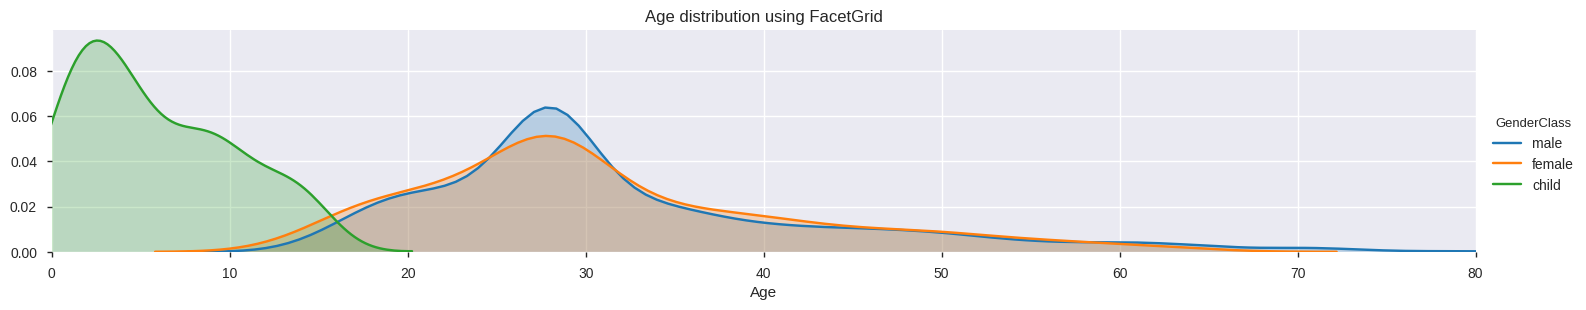

In [13]:
as_fig = sns.FacetGrid(titanic_data,hue='GenderClass',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_data['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
plt.title('Age distribution using FacetGrid')

- In titanic RMS __child__ of Age __3-8__ yrs are in majority.
- Maximum __males and females__ are of Age __25-35__ yrs. 

Using groupby

In [14]:
titanic_data.groupby(['Survived','GenderClass'])['Survived'].count()

Survived  GenderClass
0         child           33
          female          66
          male           450
1         child           45
          female         209
          male            88
Name: Survived, dtype: int64

From the above you can see that its __difficult__ to absorb information quickly by looking at __numbers.__ Therefore we will make variety of plots to get clear vision of the scenario.

- Using factorplot -- renamed as catplot in later versions

Text(0.5, 1.0, 'Factor plot for male female and child')

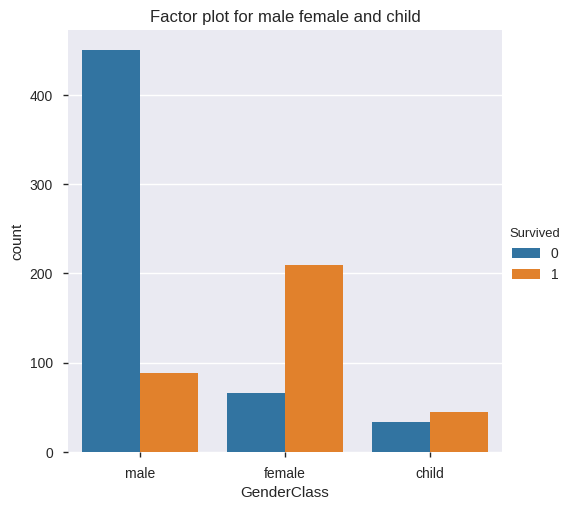

In [15]:
sns.catplot('GenderClass', hue='Survived', kind='count', data=titanic_data);
plt.title('Factor plot for male female and child')

- Majority of __males died__.
- __Females__ have high probability to __survive.__

To know the exact %

In [16]:
print("% of women survived: " , titanic_data[titanic_data.GenderClass == 'female']['Survived'].sum()/titanic_data[titanic_data.GenderClass == 'female']['Survived'].count())
print("% of men survived:   " , titanic_data[titanic_data.GenderClass == 'male']['Survived'].sum()/titanic_data[titanic_data.GenderClass == 'male']['Survived'].count())
print("% of child survived:   " , titanic_data[titanic_data.GenderClass == 'child']['Survived'].sum()/titanic_data[titanic_data.GenderClass == 'child']['Survived'].count())

% of women survived:  0.76
% of men survived:    0.16356877323420074
% of child survived:    0.5769230769230769


- Using pie plot

Text(0.5, 1.0, 'Survived (child)')

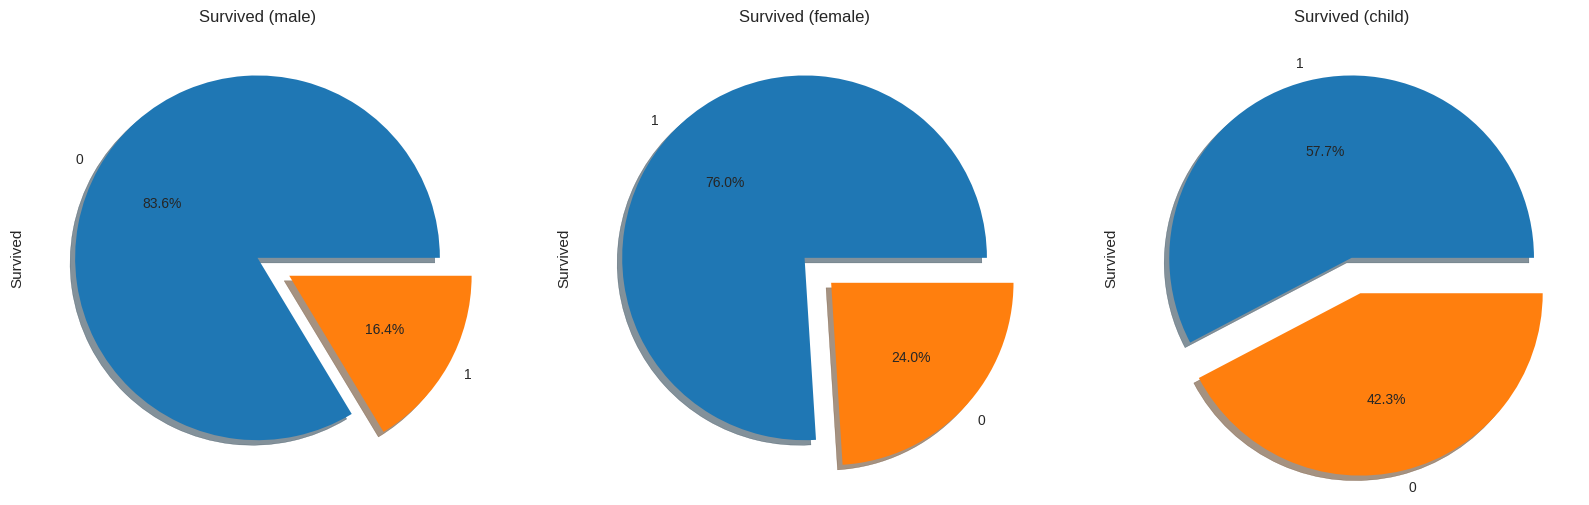

In [17]:
f,ax = plt.subplots(1,3,figsize=(20,7))
titanic_data['Survived'][titanic_data['GenderClass'] == 'male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
titanic_data['Survived'][titanic_data['GenderClass'] == 'female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
titanic_data['Survived'][titanic_data['GenderClass'] == 'child'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
ax[2].set_title('Survived (child)')

From the above pie plot you can see how survival depends on whether the passenger is a child, male or female.
- __76% of females__ survived.
- __57% of children__ also survived.
- Only __16% of males__ survived.

In [18]:
titanic_data['Survived'][titanic_data['GenderClass'] == 'male'].value_counts()

0    450
1     88
Name: Survived, dtype: int64

In [19]:
titanic_data['Survived'][titanic_data['GenderClass'] == 'female'].value_counts()

1    209
0     66
Name: Survived, dtype: int64

In [20]:
(titanic_data.Survived==0).sum()

549

Using __donut pie chart__ to see the relationship between __survival and gender__

In [0]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

In [0]:
import matplotlib.pyplot as plt
 
# Make data: 
group_names=['Survived', 'Not Survived']
group_size=[342,549]
subgroup_names=['Survived.Male','Survived.Female','Not Survived.Male','Not Survived.Female']
subgroup_size=[88,209,450,66]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Donut plot')
# show it
plt.show()


<a id=section403></a>

### 4.4. What is the rate of survival of males, females and child on the basis of Passenger Class?

- Using mathematical function

In [21]:
print("% of survivals in") 
print("Pclass=1 : ", titanic_data[titanic_data.Pclass == 1].Survived.sum()/titanic_data[titanic_data.Pclass == 1].Survived.count())
print("Pclass=2 : ", titanic_data.Survived[titanic_data.Pclass == 2].sum()/titanic_data[titanic_data.Pclass == 2].Survived.count())
print("Pclass=3 : ", titanic_data.Survived[titanic_data.Pclass == 3].sum()/titanic_data[titanic_data.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


- Using crosstab function

In [22]:
pd.crosstab([titanic_data.GenderClass, titanic_data.Survived], titanic_data.Pclass, margins=True).apply(lambda r: 100*r/len(titanic_data), axis=1).style.background_gradient(cmap='autumn_r')

You can see how the percentage of males, females and children survived are varying depending on the passenger class they are in. Also, its quiet difficult to develop quick insights by looking only at numbers. Therefore we will explore doing the same with the help of __plotting.__

- Using __violin plot__ to see the relationship between __Pclass and Survived__

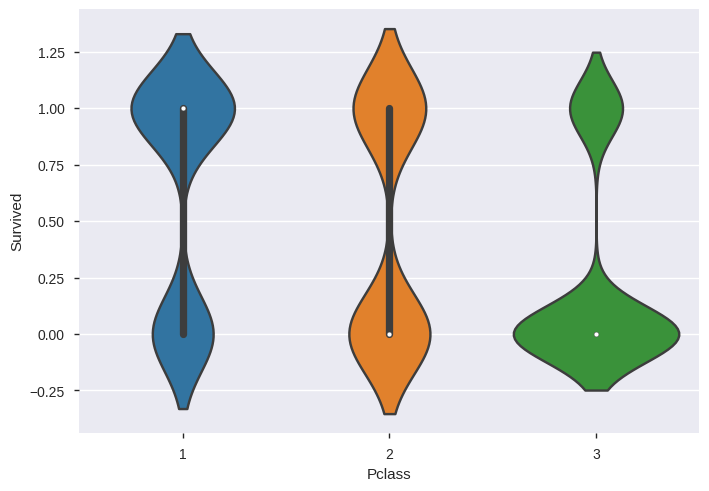

In [23]:
sns.violinplot('Pclass','Survived', kind='point', data = titanic_data)
#plt.title('Violinplot Pclass Vs Survived')
#plt.show()

Above is another beautiful way to see how the survival rate is varying with Passenger class.
- __Pclass 3__ have __more__ people who __died__, and for __Pclass 1 survival rate is more.__

 Drawing __factorplot__ to look at the __distribution of popluation__ with __Pclass and GenderClass.__

Text(0.5, 1.0, 'Factorplot with kind = "count" for Pclass and GenderClass')

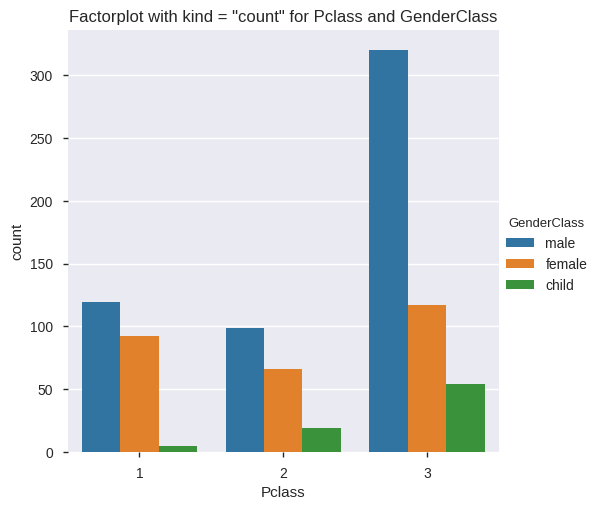

In [24]:
sns.catplot('Pclass', data=titanic_data, hue='GenderClass', kind='count')
plt.title('Factorplot with kind = "count" for Pclass and GenderClass')

1. __Pclass 3__ have _maximum_ number of __males__
2. __Pclass 1__ have _minimum_ number of __children__.

- using factorplot to see the variation of __surviavl rate with Pclass and GenderClass.__

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Factorplot for Survivale rate variation with Pclass and GenderClass')

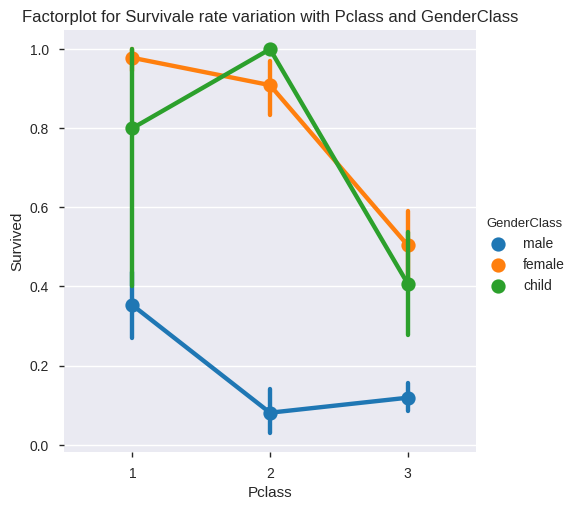

In [25]:
sns.factorplot('Pclass','Survived', data=titanic_data, hue='GenderClass')
plt.title('Factorplot for Survivale rate variation with Pclass and GenderClass')

The above graph shows:
1. the survival rate for male is very __low__ _irrespective of the class_ he belongs to. 
2. And, the survival rate is _less_ for all the _3rd class passengers._
3. __Almost all women__ in Pclass __1 and 2 survived__ and __nearly all men__ in Pclass __2 and 3 died.__

<a id=section404></a>

### 4.4 What is the survival rate considering the Embarked variable?

- Using countplot 

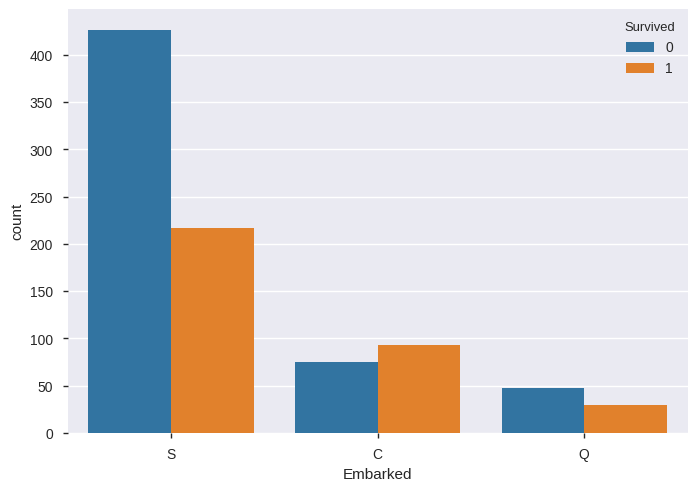

In [0]:
sns.countplot('Embarked',data=titanic_data, hue='Survived')

1. __Maximum___ number of people have __Southampton__ as port of embarkment. 
2. Also observe people who boarded at _Cherbourg_, _more_ people _survived than died_, and this is reverse for Queenstown.

- Using __factorplot__ and __kind = 'point'__

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


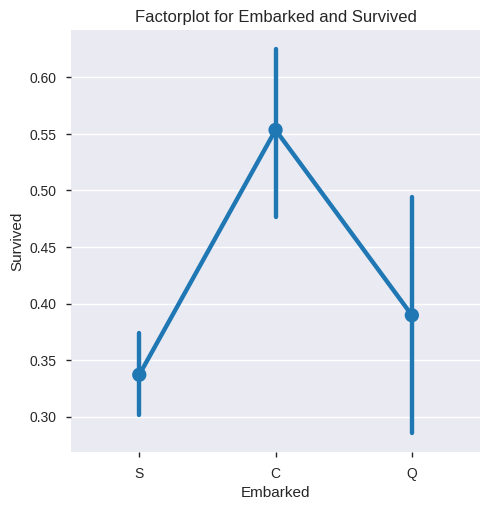

In [0]:
sns.factorplot('Embarked','Survived', kind='point', data = titanic_data)
plt.title('Factorplot for Embarked and Survived')
plt.show()

<a id=section405></a>

### 4.5. Survival rate - Comparing Embarked and Sex.

- Distribution of _GenderClass_ with respect to _Port of Embarkment_ using __Countplot__.

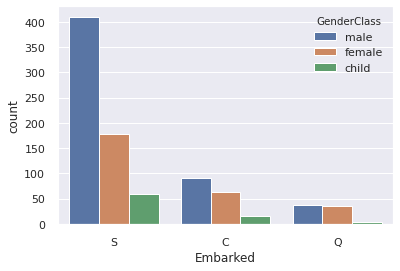

In [0]:
sns.countplot('Embarked',data=titanic_data, hue='GenderClass')

Most of the people boarded from __S__, Also among all who boarded, __males__ constitutes the __majority__ of percentage.

- Using Factorplot to see variation of __survival rate with port of embarkment and GenderClass__

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


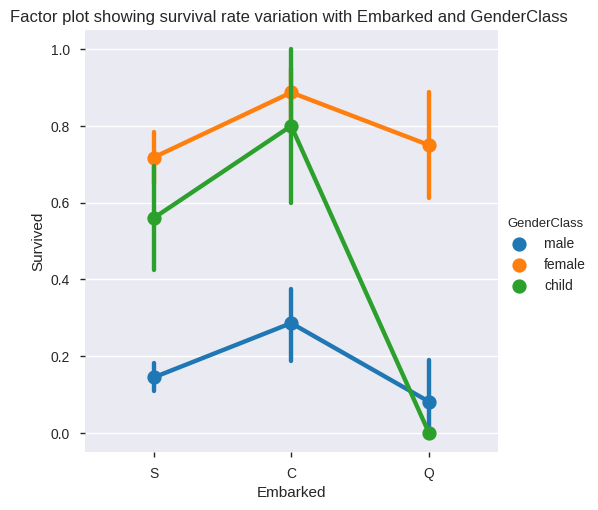

In [26]:
sns.factorplot('Embarked','Survived', hue= 'GenderClass', kind='point', data= titanic_data)
plt.title('Factor plot showing survival rate variation with Embarked and GenderClass ')
plt.show()

- Chances of survival of __females__ who boarded from __C__ is _highest_.
- Chances of survival of __males__ boarding from __Q__ is _lowest_

<a id=section406></a>

### 4.6 How survival rate vary with Embarked, Sex and Pclass.

Seeing relation between Pclass and Embarked.

Text(0.5, 1.0, 'Relation Between Pclass and Embarked')

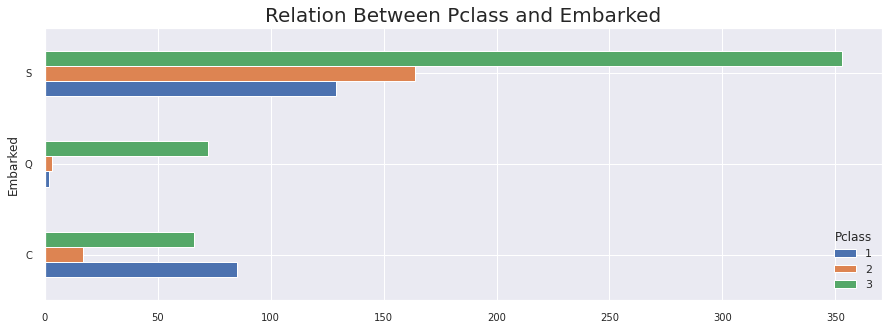

In [0]:
relation = pd.crosstab( titanic_data.Embarked, titanic_data.Pclass )
relation.plot.barh(figsize=(15,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Relation Between Pclass and Embarked',size=20)

Maximum people who boarded from __S__ belongs to __Pclass 3__.<br/>
Most of the passengers belonging to __Pclass 1__ boarded from __C and S__  


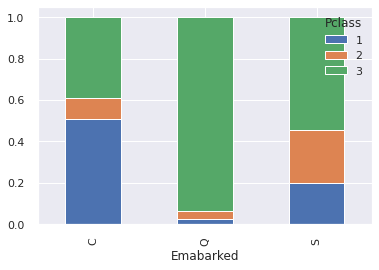

In [0]:
dummy = relation.div(relation.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Emabarked')

- Using Swarmplot

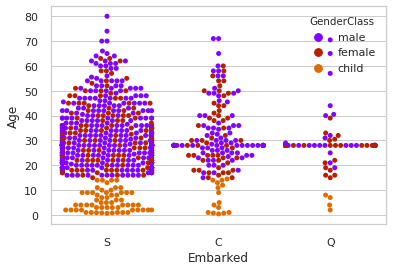

In [0]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x="Embarked", y="Age", hue="GenderClass", palette="gnuplot", data=titanic_data)

- Using factorplot with kind = 'point'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


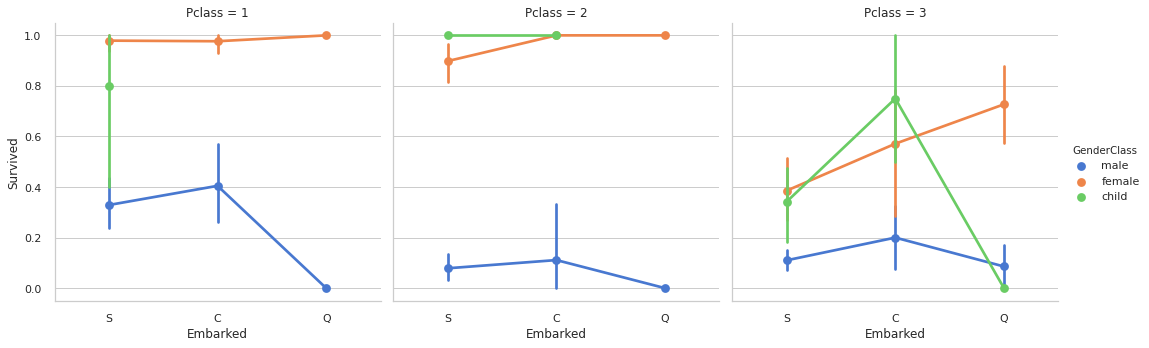

In [0]:
sns.factorplot('Embarked','Survived', col='Pclass', hue= 'GenderClass', kind='point', data = titanic_data)
plt.show()

- Practically all _women_ of __Pclass 2__ that embarked in __C and Q survived__, also nearly all _women_ of __Pclass 1__ survived_.
- All _men_ of __Pclass 1 and 2__ embarked in __Q died__, survival rate for men in __Pclass 2 and 3__ is always __below 0.2__.
- For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. __0.4__

<a id=section407></a>

### 4.7 Segment age in bins with size 10.

In [0]:
for i in range(8,0,-1):
        titanic_data.loc[ titanic_data['Age'] <= i*10, 'Age_bin'] = i

In [0]:
print(titanic_data[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5  28.0      3.0
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


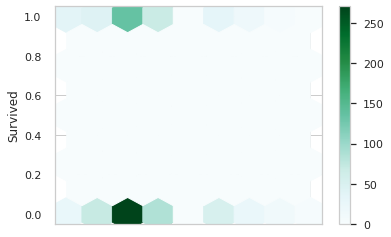

In [0]:
titanic_data.plot.hexbin(x='Age_bin', y='Survived', gridsize=8)

Comparing count of those who survived and died with respect to the Age_bin they are in.
- __Age_bin 1__: As you can see hexagon for Survived( 1.0 ) is darker than Died(0.0), means __more children survived than died__.
- __Age_bin 3__: __More died than survived__, Also count of survived is highest among all age bins ( see horizontaly along Survived = 1.0 ) , means maximum people who boarded Titanic were from this age group. 
- __Age_bin >4__: More people died than survived.

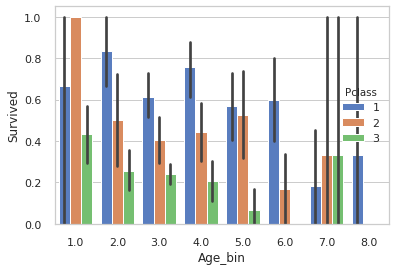

In [0]:
sns.barplot(x = "Age_bin", y = "Survived", hue = "Pclass", data = titanic_data)
plt.show()

- Calculating number of people of Age_bin = 1 and 8 from each Pclass.

In [0]:
titanic_data[(titanic_data.Age_bin == 1)]['Pclass'].value_counts()

3    44
2    17
1     3
Name: Pclass, dtype: int64

In [0]:
titanic_data[(titanic_data.Age_bin == 1)&(titanic_data.Pclass == 1)]['Survived']

297    0
305    1
445    1
Name: Survived, dtype: int64

In [0]:
titanic_data[(titanic_data.Age_bin == 8)]['Pclass'].value_counts()

1    3
3    2
Name: Pclass, dtype: int64

- Among children of __age 0-10 yrs__ we dont have enough data points(3) in Pclass 1, therefore __discarding it__ (blue line of Age_bin 1)<br/>
- Also number of passengers belonging to age group __70-80 yrs__, is very less, therefore __ignoring them.__<br/>
- In __each Pclass__, we can see that the probability of survivying of __small children(Age = 0-10 yrs)__ is _higher_ than rest age group.<br/>
- In every Age_bin(ignoring Pclass 1 of first, and last Age_bin), __survival probability is highest for Pclass 1 and lowest for Pclass 3.__

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


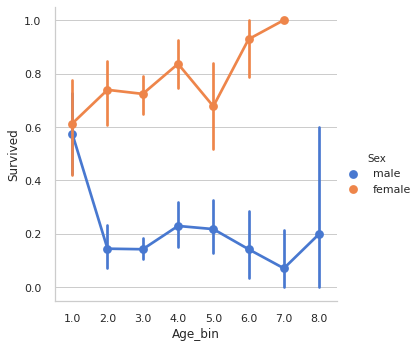

In [0]:
sns.factorplot('Age_bin','Survived',hue='Sex',kind='point',data=titanic_data)
plt.show()

Its clear from the above graph that among people of all the ages, __females__ in general have __higher probability of survival than males__.

In [0]:
sns.factorplot('Age_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=titanic_data)
plt.show()

Calculating number of females from each Pclass in age group 1.

In [0]:
titanic_data[(titanic_data.Age_bin == 1) & (titanic_data.Sex =='female')]['Pclass'].value_counts()

3    22
2     8
1     1
Name: Pclass, dtype: int64

From the factor plot:<br/>
- Among __males__, probability of survival of __children__ is _higher_ than rest age groups.<br/>
- In general for males, as __Pclass increases, survival probability decreases.__
- Among female children (Age_bin == 1), there is only 1 girl, therfore _discarding_ this.<br/>
- For the rest of the females, as _Pclass increases_, _survival probability decreases._<br/>
- You can also see survival rate within each Pclass for males and females.

<a id=section408></a>

### 4.8 Analysing survival rate with FamilySize.

- Using __factorplot__ to know the survival rate on the basis of __FamilySize__.

Text(0.5, 1.0, 'Survival by Total Family Size')

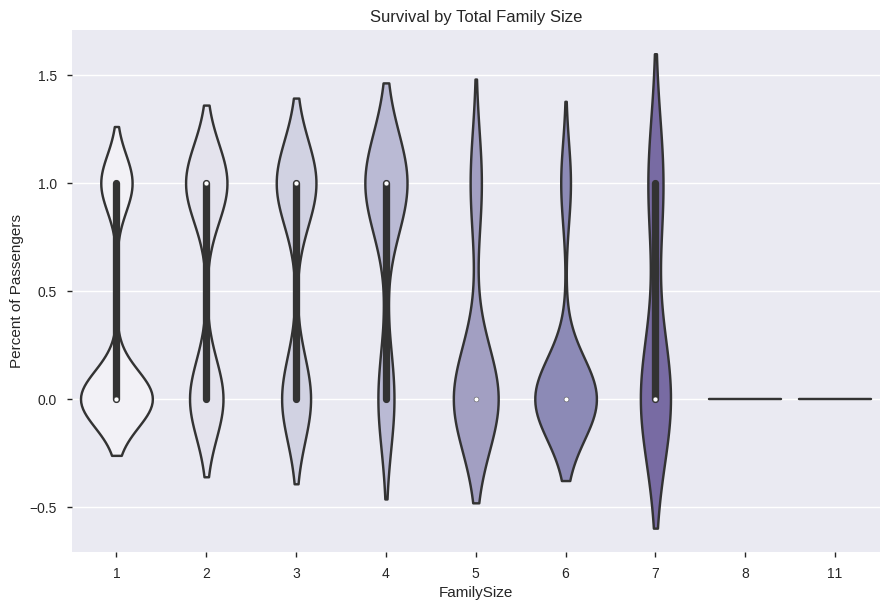

In [28]:
ax = sns.catplot(x='FamilySize', y='Survived', data=titanic_data, kind='violin', aspect=1.5, height=6, palette="Purples")
ax.set(ylabel='Percent of Passengers')
plt.title('Survival by Total Family Size')

As __size of family increases__ its chances of survival also __increases__.

<a id=section409></a>

### 4.9 Segment fare in bins of size 12.

- Using Distplot to see the distribution of __Fare__. 

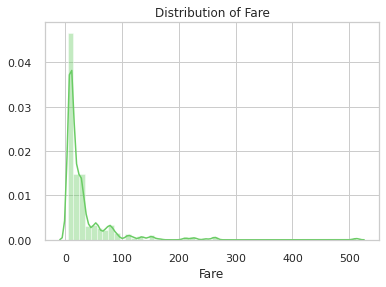

In [0]:
sns.distplot(titanic_data['Fare'],color ='g')
plt.title('Distribution of Fare')
plt.show()

We have seen that __'Fare'__ mostly varies between __10 and 90.__ We will use this information to create bins.

- Creating a new column named __'Fare_bin'__ based on 12 interval ranges in 'Fare' as __12 bins.__

In [0]:
for i in range(12,0,-1):
    titanic_data.loc[titanic_data['Fare'] <= i*10, 'Fare_bin'] = i
titanic_data.loc[titanic_data['Fare'] >110, 'Fare_bin']= 12

In [0]:
print(titanic_data[['Fare' , 'Fare_bin']].groupby('Fare_bin')['Fare'].count())

Fare_bin
1.0     321
2.0     194
3.0     142
4.0      58
5.0      16
6.0      38
7.0      17
8.0      31
9.0      17
10.0      4
11.0      4
12.0     49
Name: Fare, dtype: int64


- Using __barrplot__ to plot the relationship between __survival rate and Fare_bin and Pclass.__

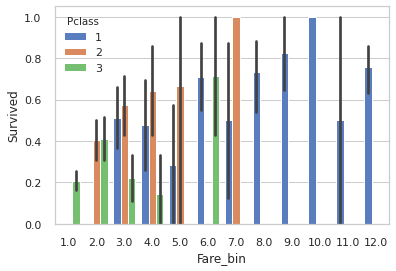

In [0]:
sns.barplot(x = "Fare_bin", y = "Survived", hue = "Pclass", data = titanic_data)
plt.show()

- As __fare increases, survival chances also increases__.
- Also __Pclass 1__ (blue color) have __more chances to survive__ compared to other Pclass.

<a id=section410></a>

### 4.10 Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'

Text(0.5, 1.0, 'Pair Plot')

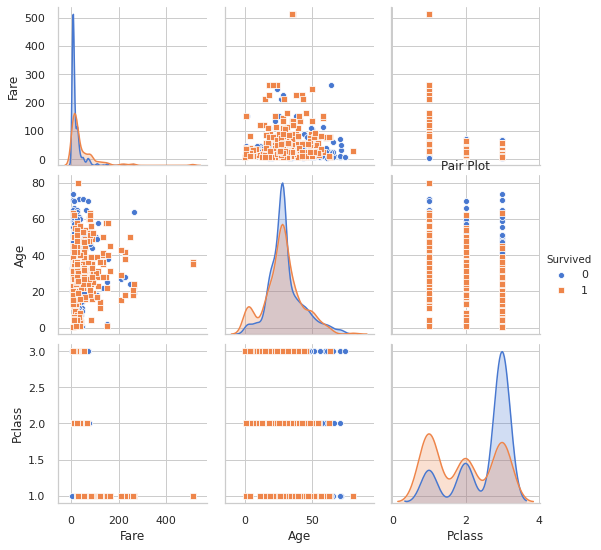

In [0]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of Pclass 1 survived than died (First peak of red is higher than blue)
- More people of Pclass 3 died than survived (Third peak of blue is higher than red)
- More people of age group 20-40 died than survived.
- Most of the people paying less fare died.

<a id=section411></a>

### 4.11 Establish coorelation between all the features using heatmap.

Text(0.5, 1.0, 'Correlation between features')

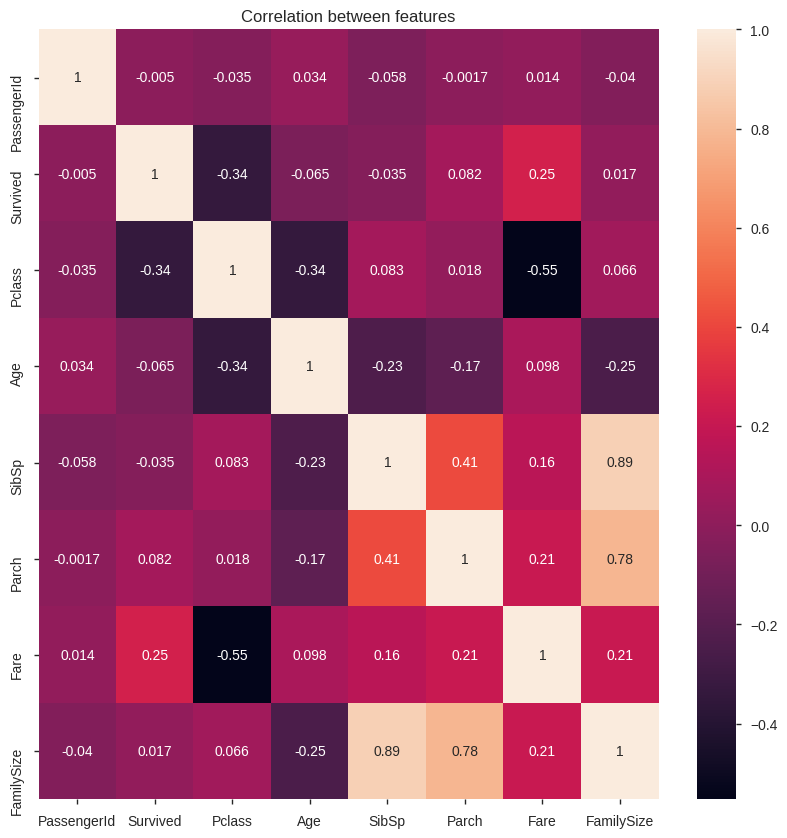

In [31]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True)
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

<a id=section412></a>

### 4.12 Hypothesis: Women and children are more likely to survive

On studying Questionnaire 4.1, 4.2 and 4.3 we observed that an overwhelming percentage of __women & children__ have survived the titanic clash.
- __76%__ of __females__ survived.
- __57%__ of __children__ also survived.
- Only __16%__ of __males__ survived.<br/>
Also the survival rate for male is very low irrespective of the _class_ he belongs to and the _survival rate is less_ for all the _3rd class passengers._ Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died.

<a id=section5></a>

## 5. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like _Age, Embarked, Fare, SibSp and Parch_ on the rate of survival.
- The most important inference drawn from all this analysis is, we get to know what are the __features on which survival is highly positively and negatively coorelated with.__ 
- This analysis will help us to choose which __machine learning model__ we can apply to predict survival of test dataset. 